In [ ]:
cd drive/MyDrive/working_dir/

/content/drive/MyDrive/working_dir


In [1]:
# Computing Libaries
import numpy as np
import pandas as pd
# Ploting Libaries
import matplotlib.pyplot as plt
import seaborn as sns

# Pre Proccessing Modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
# Accuracy Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# options
import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls -a

.  ..  .config	sample_data


In [4]:
data = pd.read_csv('/train_qWM28Yl.csv')
testData = pd.read_csv('/test_zo1G9sv.csv')

In [5]:
testData.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


In [6]:
columns = data.columns
print(columns)

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')


In [7]:
testData.shape

(39063, 43)

In [8]:
data.shape

(58592, 44)

In [9]:
gp = data.groupby('is_claim').count()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [11]:
gp

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
is_claim,,,,,,,,,,,,,,,,,,,,,
0,54844,54844,54844,54844,54844,54844,54844,54844,54844,54844,...,54844,54844,54844,54844,54844,54844,54844,54844,54844,54844
1,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,...,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748


In [12]:
# Viewing initial statistics of dataset:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [13]:
# Viewing Dataset Schema (column description):
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

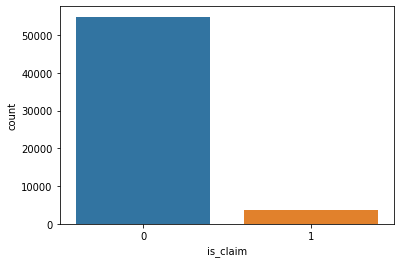

In [14]:
# Viewing Target Varaible Distribution:
sns.countplot(x= data['is_claim'], data=data)

In [15]:
# Viewing Null Columns:
data.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [16]:
# Droping NA Values:
data1 = data.dropna()
data1.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [17]:
orgData = data1

In [18]:
data1.drop('policy_id', axis=1)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [19]:
# Extracting categorical columns:
catFeatures= [col for col in data1.columns if col in data1.select_dtypes(include=object).columns]
# Extracting All Features:
features = [col for col in data1.columns if col not in ['policy_id', 'is_claim']]

# Printing Count of Features:
print(f'total features: {len(features)}')
# Printing Name of  Features:
print(features)

total features: 42
['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']


In [20]:
# Spliting Features and Target Variable:
X, y = data1.loc[:, features], data1.loc[:, 'is_claim']
# Checking Dataset Shape (Features):
print(X.shape)

(58592, 42)


In [21]:
# Encoding Categorical Data (!use oneHot Encoding as target features are more)
labelEncode = LabelEncoder()
# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    X[col] = labelEncode.fit_transform(data1[col])

## Test

In [22]:
dataT = testData

In [23]:
# Extracting categorical columns:
TcatFeatures= [col for col in dataT.columns if col in dataT.select_dtypes(include=object).columns]
# Extracting All Features:
Tfeatures = [col for col in dataT.columns if col not in ['policy_id', 'is_claim']]

# Printing Count of Features:
print(f'total features: {len(Tfeatures)}')
# Printing Name of  Features:
print(features)

total features: 42
['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']


In [24]:
# Spliting Features and Target Variable:
TestX = dataT.loc[:, Tfeatures]
# Checking Dataset Shape (Features):
print(TestX.shape)

(39063, 42)


In [25]:
TestX.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0


In [26]:
# Encoding Categorical Data (!use oneHot Encoding as target features are more)
labelEncode = LabelEncoder()
# Iterating Over each categorial features:
for col in TcatFeatures:
    print(col)
    # storing its numerical value:
    TestX[col] = labelEncode.fit_transform(dataT[col])

policy_id
area_cluster
segment
model
fuel_type
max_torque
max_power
engine_type
is_esc
is_adjustable_steering
is_tpms
is_parking_sensors
is_parking_camera
rear_brakes_type
transmission_type
steering_type
is_front_fog_lights
is_rear_window_wiper
is_rear_window_washer
is_rear_window_defogger
is_brake_assist
is_power_door_locks
is_central_locking
is_power_steering
is_driver_seat_height_adjustable
is_day_night_rear_view_mirror
is_ecw
is_speed_alert


In [27]:
TestX.shape

(39063, 43)

In [28]:
# Checking Columns Values:
print(X.columns)
# Checking its updated Values:
X.head()

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'policy_id'],
      dtype='object')


,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,policy_id
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,1
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,2
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,3
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,4


# Correleration

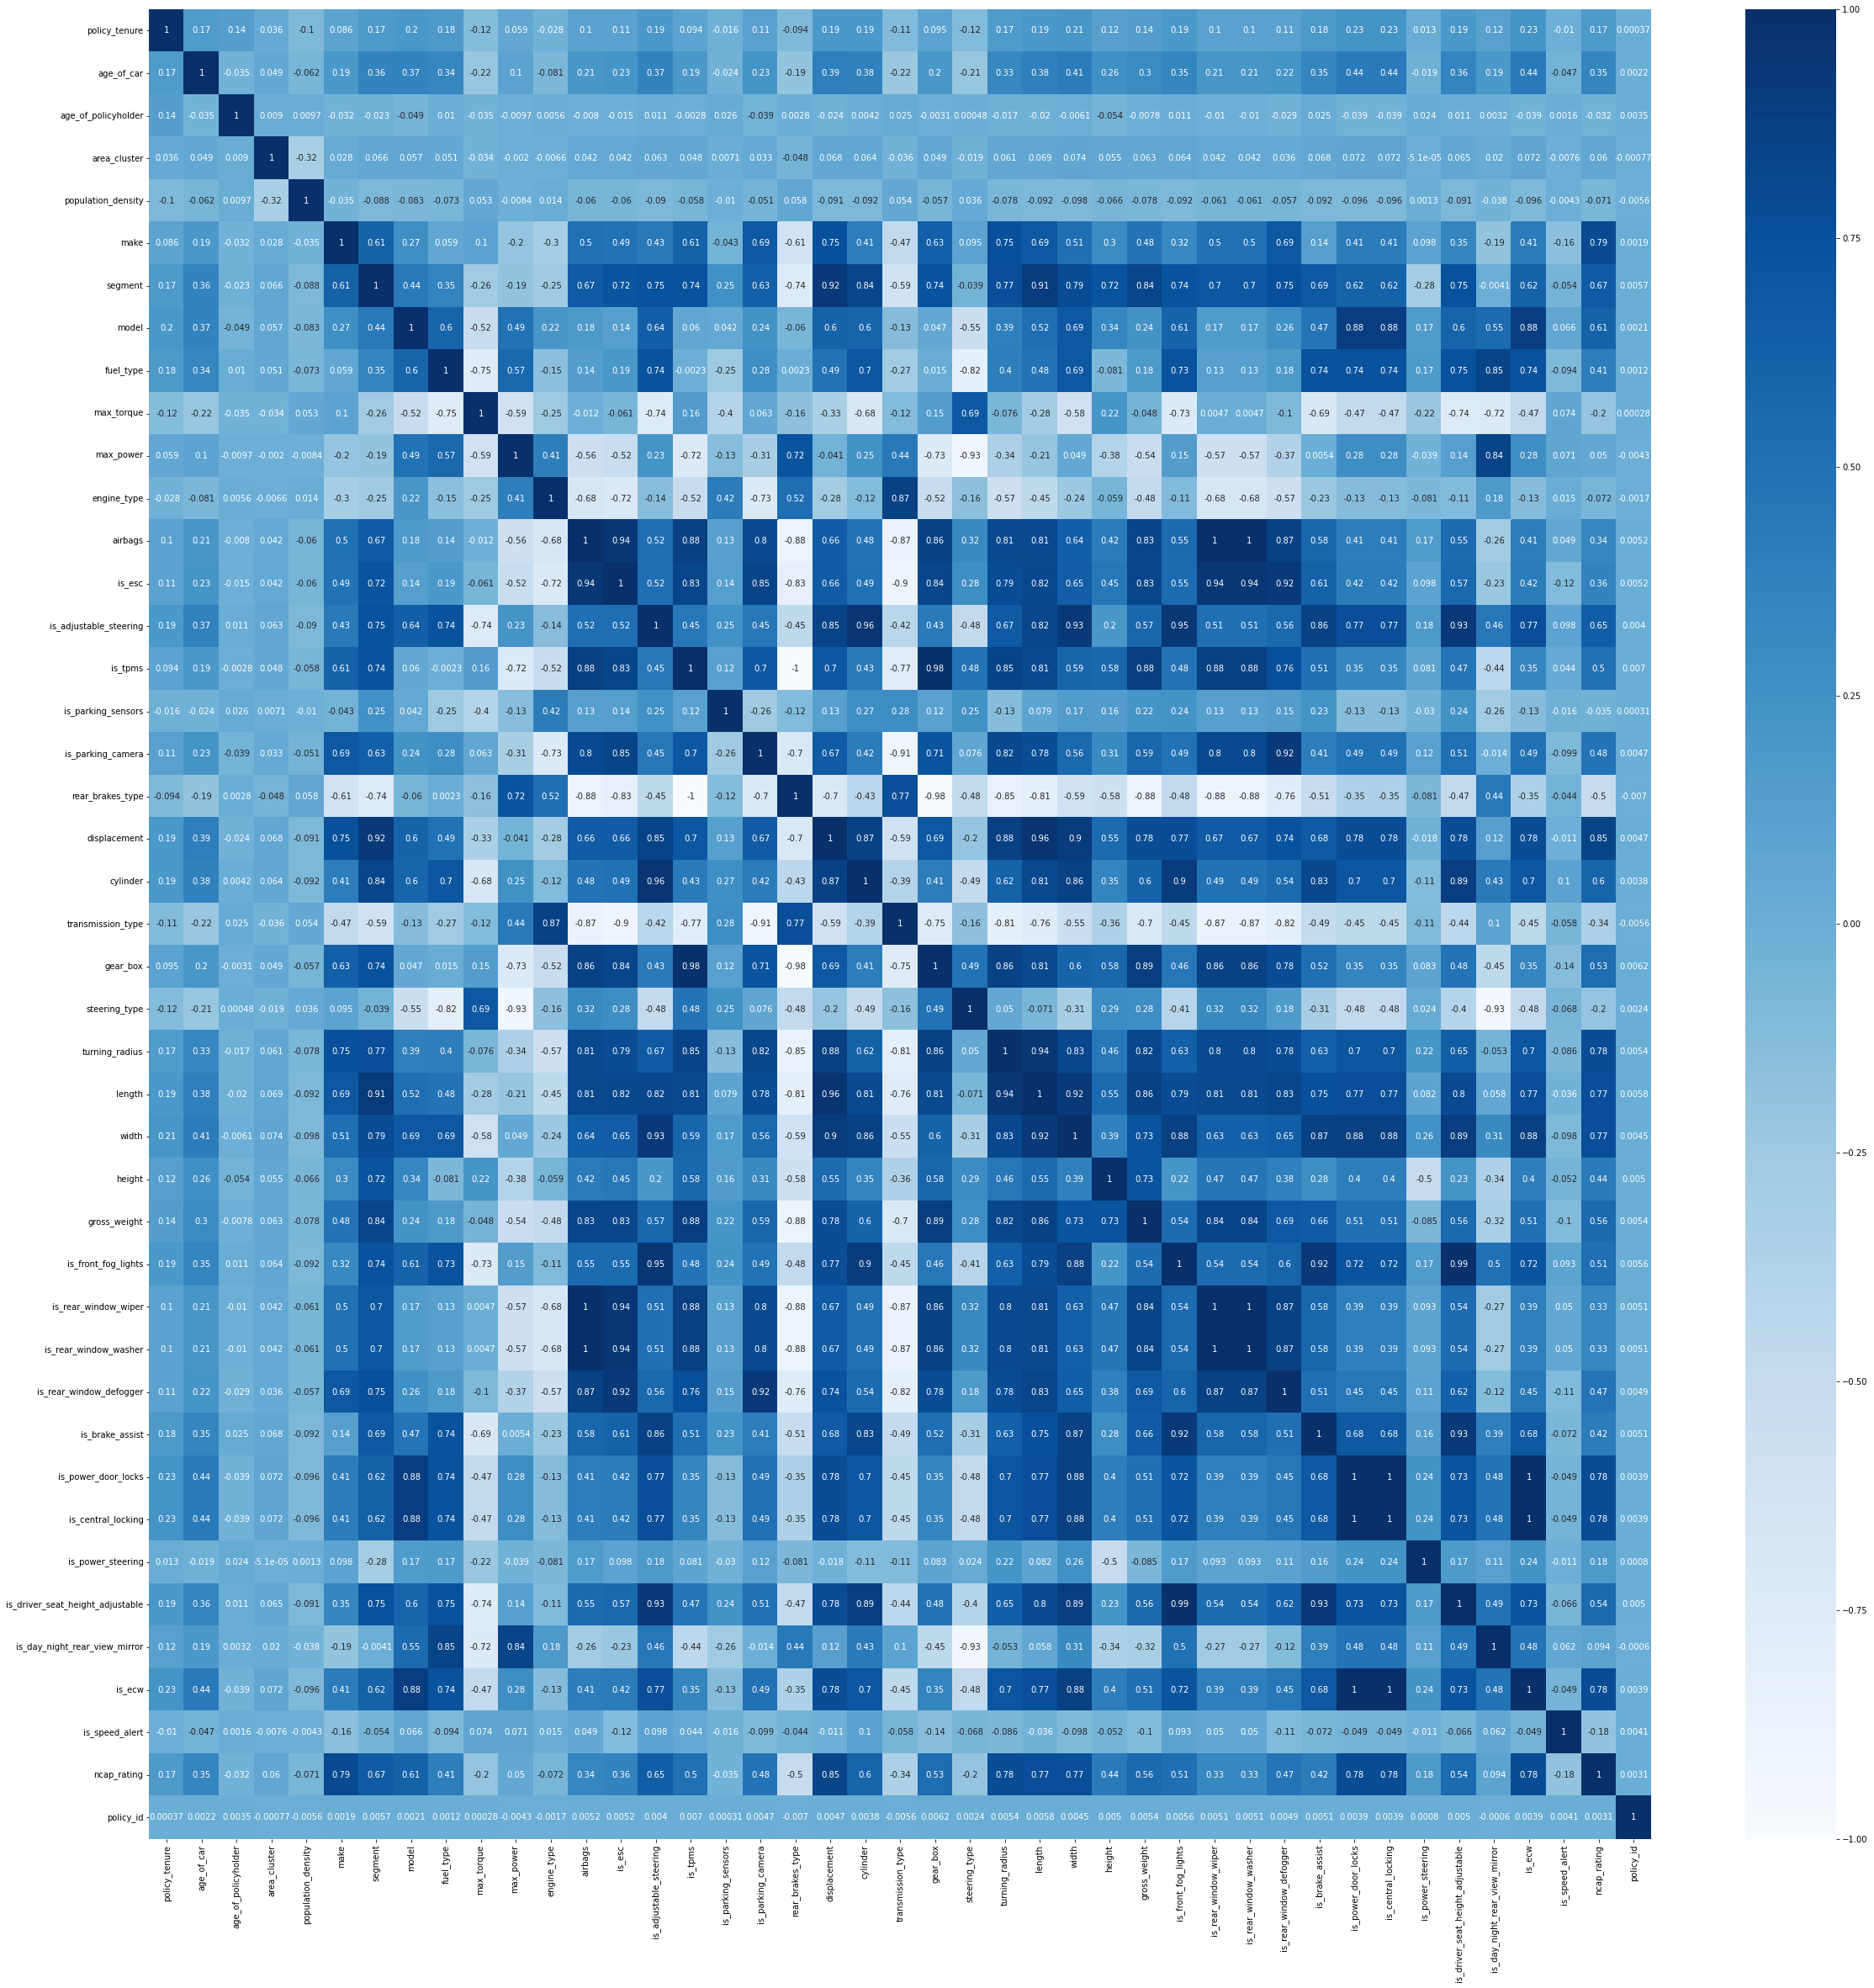

In [ ]:
# Correlation Matrix:
plt.figure(figsize = (40,40))
corr = X.corr()
# print(corr)

# Ploting Heatmap:
sns.heatmap(corr, annot = True,cmap=plt.cm.Blues )
plt.show()

In [ ]:
# Spliting the Sequence and Alphabets:
cat1 = X[catFeatures]
num1 = X[features]      

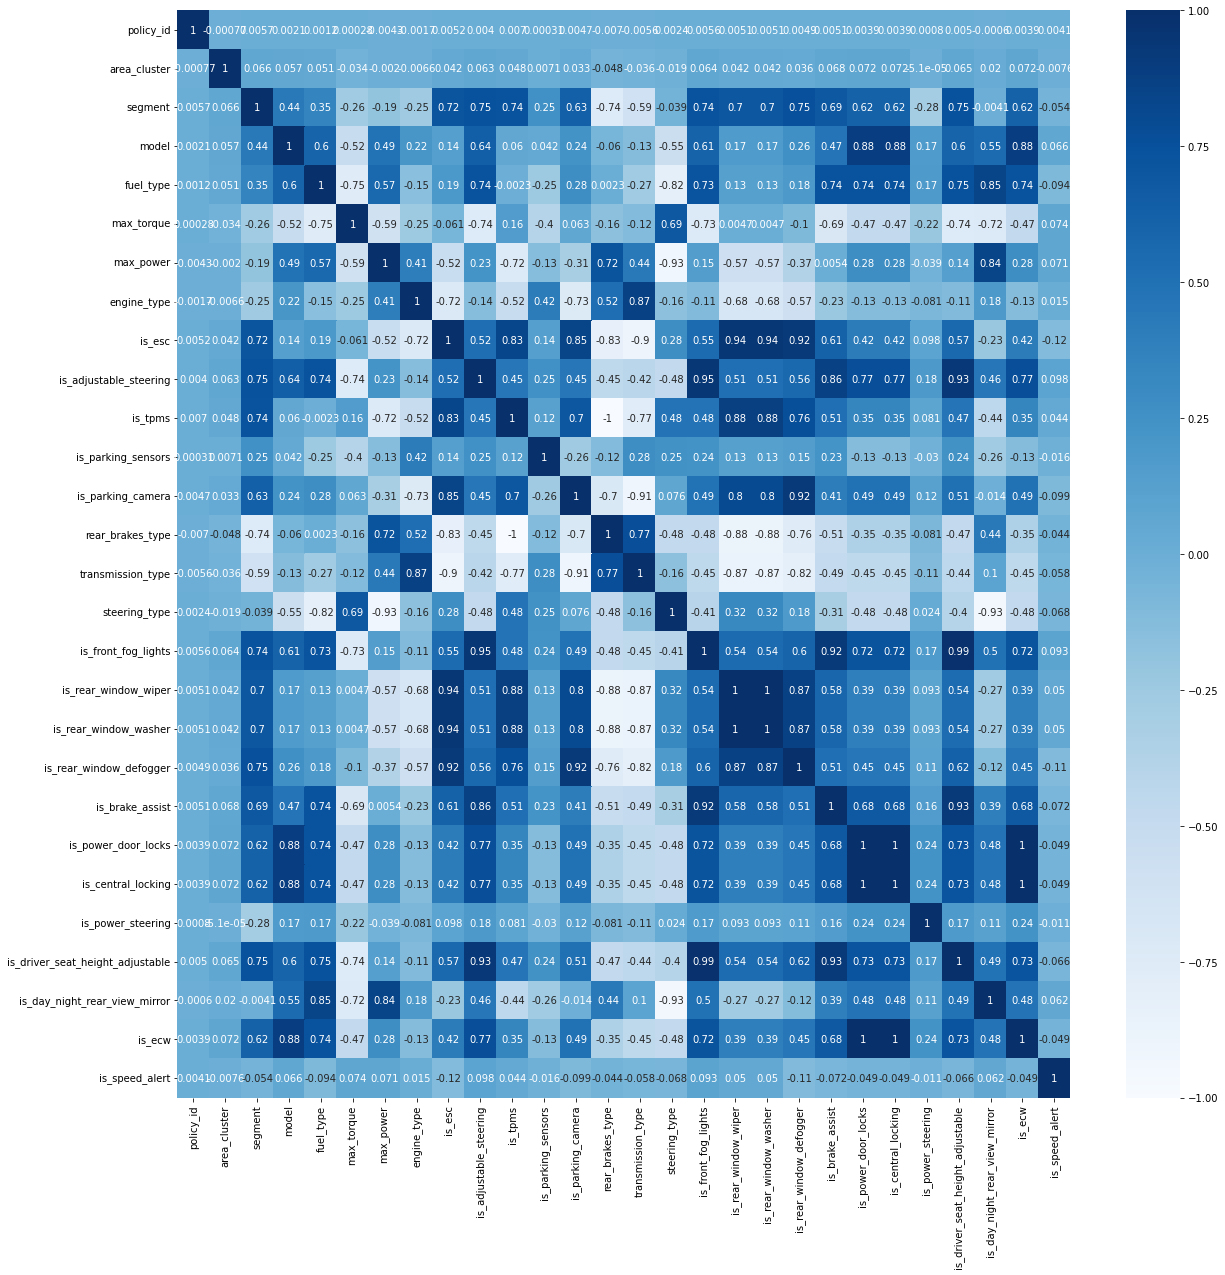

In [ ]:
# Ploting Sequence Correleration:
xSeq = cat1
plt.figure(figsize = (20,20))

# Determining Correleration and Ploting Heatmap:
xSeq = xSeq.corr()
sns.heatmap(xSeq, annot = True, cmap=plt.cm.Blues )
plt.show()

In [ ]:
## Selecting High Correlerated Values:
# Iterating over the sequence:
for i in cat1:
  xSeqCorr = xSeq[i]
  # Selecting Features over 0.2:
  relevantFeaturesSeq = xSeqCorr[xSeqCorr < 1]
  print(relevantFeaturesSeq)

area_cluster                       -0.000769
segment                             0.005690
model                               0.002067
fuel_type                           0.001247
max_torque                          0.000280
max_power                          -0.004339
engine_type                        -0.001726
is_esc                              0.005240
is_adjustable_steering              0.003993
is_tpms                             0.007049
is_parking_sensors                  0.000314
is_parking_camera                   0.004686
rear_brakes_type                   -0.007049
transmission_type                  -0.005648
steering_type                       0.002408
is_front_fog_lights                 0.005629
is_rear_window_wiper                0.005150
is_rear_window_washer               0.005150
is_rear_window_defogger             0.004923
is_brake_assist                     0.005110
is_power_door_locks                 0.003941
is_central_locking                  0.003941
is_power_s

In [ ]:
relevantFeaturesSeq

policy_id                           0.004088
area_cluster                       -0.007578
segment                            -0.053501
model                               0.065668
fuel_type                          -0.094221
max_torque                          0.074049
max_power                           0.071281
engine_type                         0.014785
is_esc                             -0.116688
is_adjustable_steering              0.097987
is_tpms                             0.044278
is_parking_sensors                 -0.016221
is_parking_camera                  -0.098614
rear_brakes_type                   -0.044278
transmission_type                  -0.057729
steering_type                      -0.067620
is_front_fog_lights                 0.092604
is_rear_window_wiper                0.050390
is_rear_window_washer               0.050390
is_rear_window_defogger            -0.107567
is_brake_assist                    -0.071538
is_power_door_locks                -0.048719
is_central

In [ ]:
relevantFeaturesSeq

is_speed_alert    1.0
Name: is_speed_alert, dtype: float64

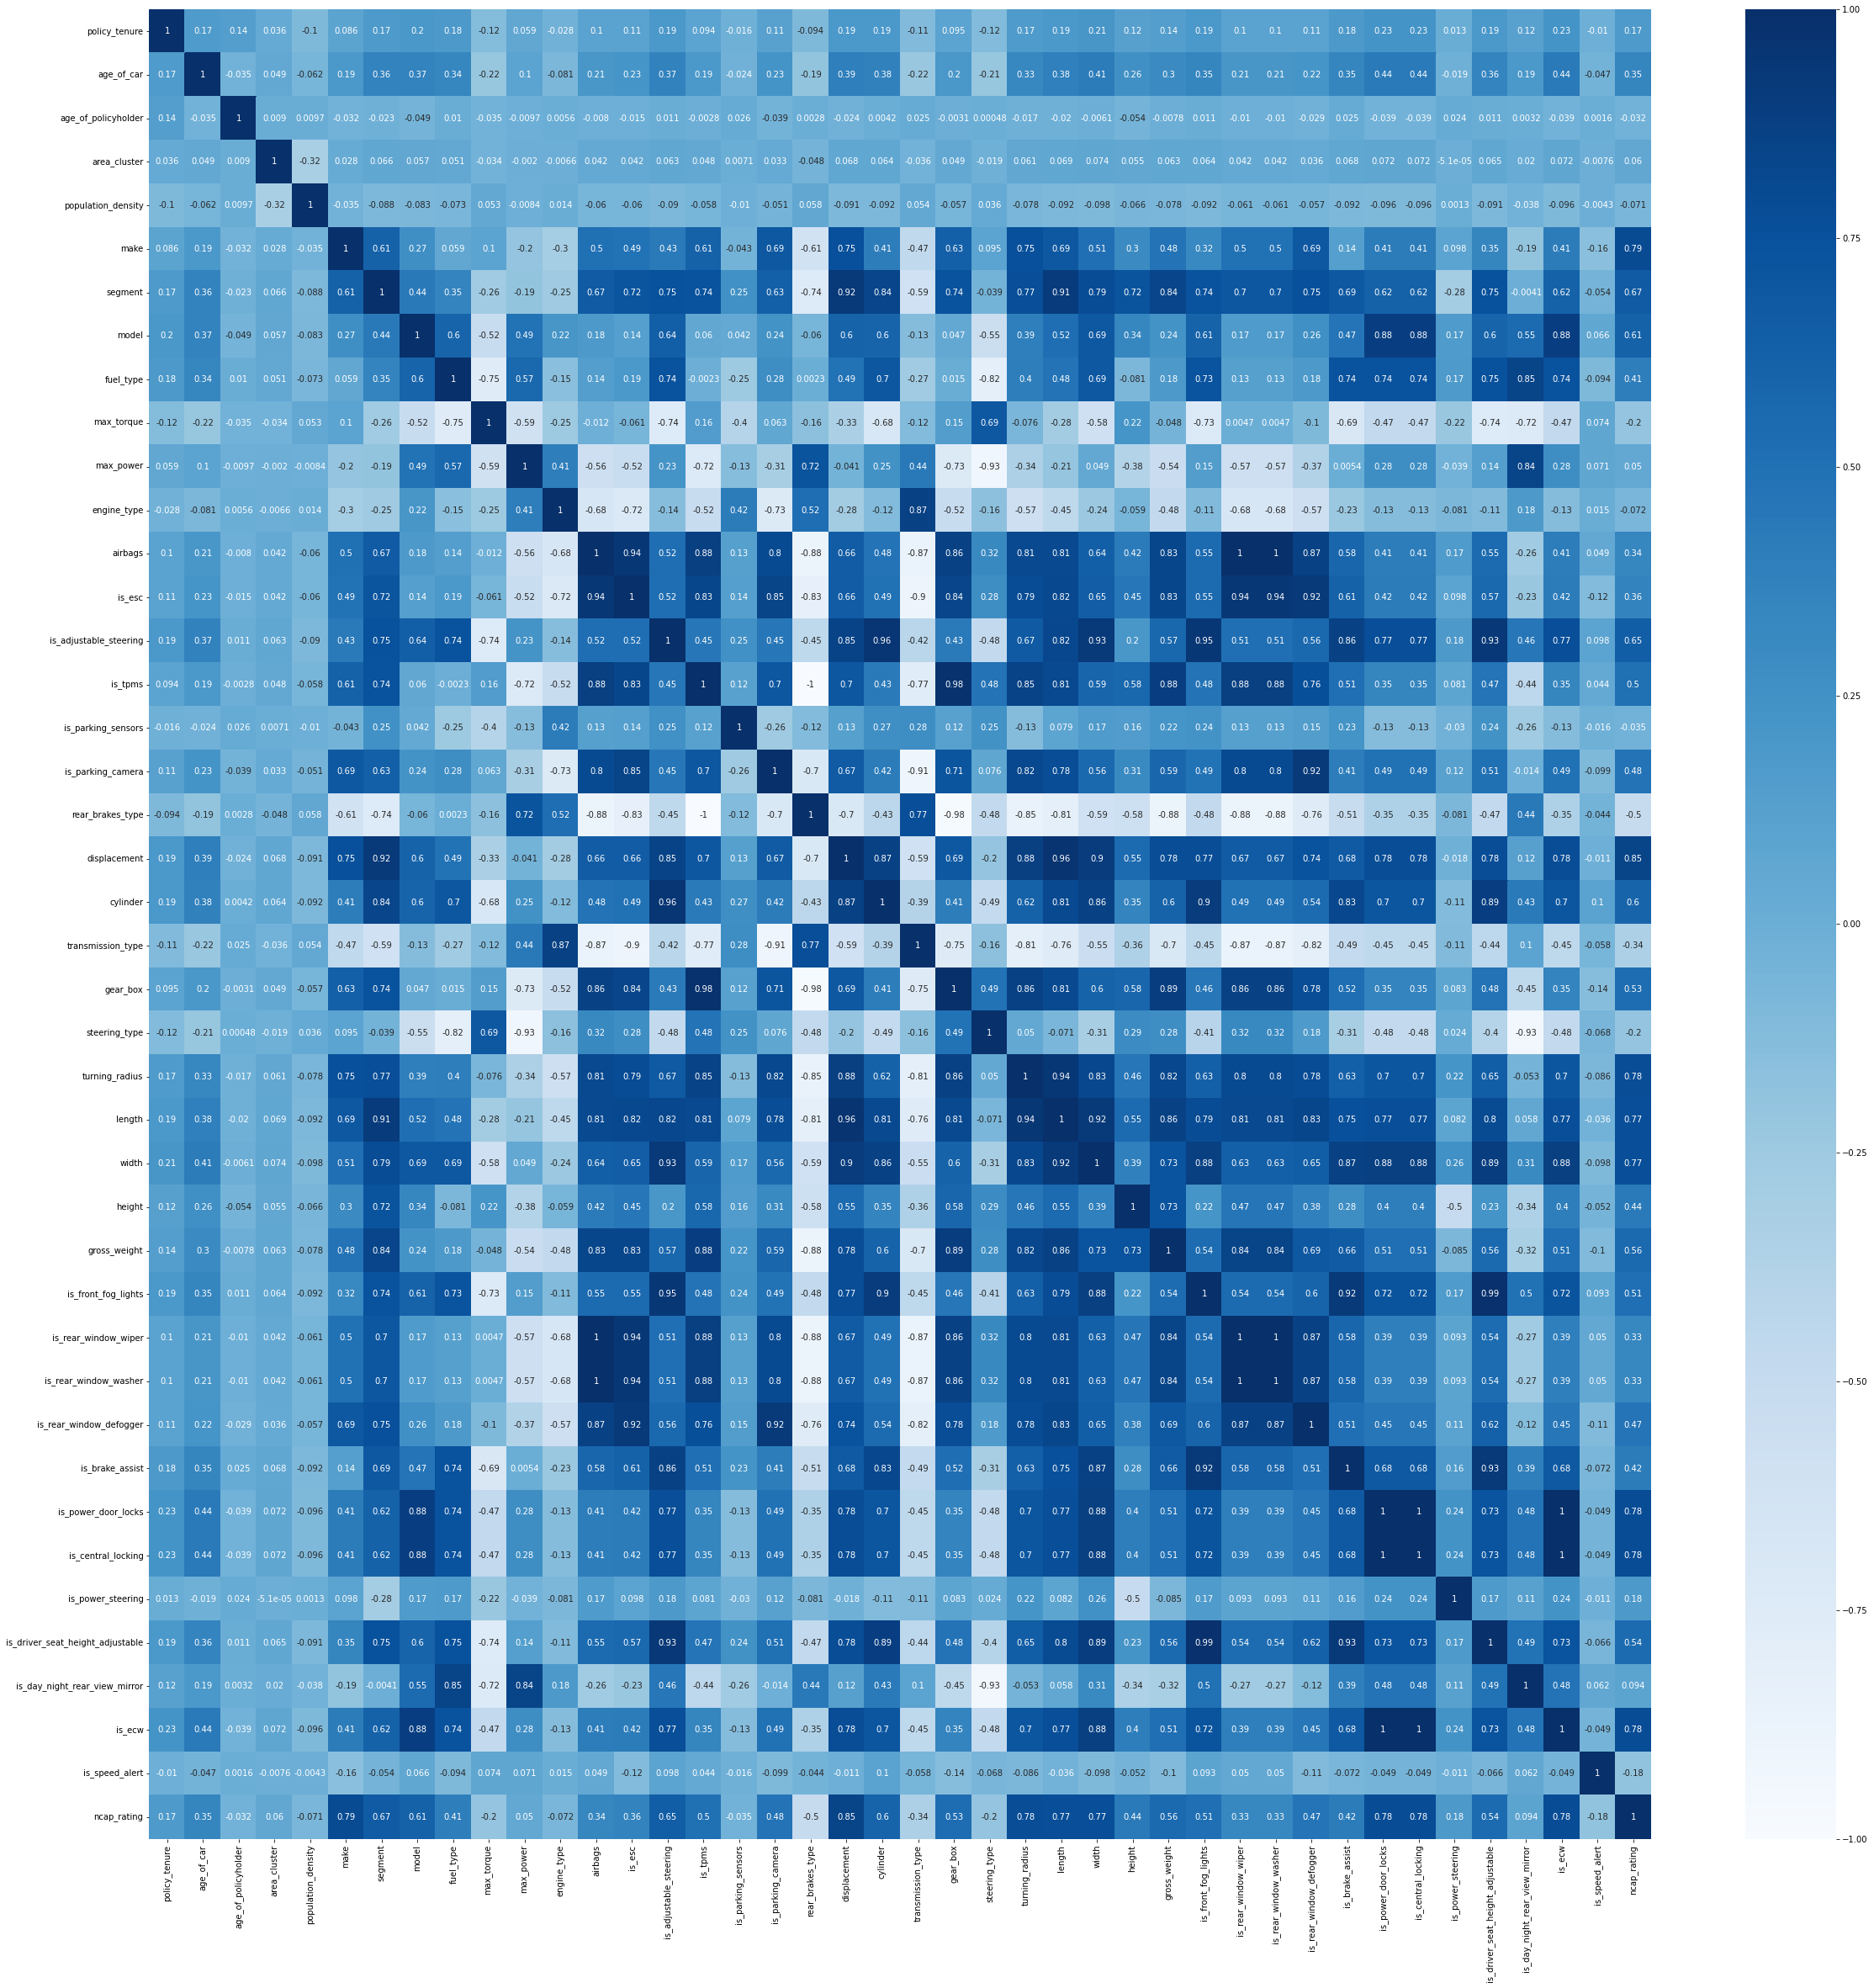

In [ ]:
# Ploting Alpha Correleration:
xAlph = num1
plt.figure(figsize = (40, 40))

# Determining Correleration and Ploting Heatmap:
xAlph = xAlph.corr()
sns.heatmap(xAlph, annot = True, cmap=plt.cm.Blues )
plt.show()

In [ ]:
## Selecting High Correlerated Values:
# Iterating over the Alpha:
for i in num1:
  xAlphCorr = xAlph[i]

  # Selecting Features over 0.2:
  relevantFeaturesAlph = xAlphCorr[xAlphCorr > 0.4]
  print(relevantFeaturesAlph)

In [ ]:
relevantFeaturesAlph

In [ ]:
relevantFeaturesSeq.shape

(1,)

In [ ]:
features = X[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']]

In [ ]:
relevantFeaturesAlph

make                                0.792254
segment                             0.666754
model                               0.612275
fuel_type                           0.405514
is_adjustable_steering              0.645792
is_tpms                             0.500452
is_parking_camera                   0.477036
displacement                        0.847065
cylinder                            0.598364
gear_box                            0.529688
turning_radius                      0.779302
length                              0.767519
width                               0.771944
height                              0.437182
gross_weight                        0.556270
is_front_fog_lights                 0.510252
is_rear_window_defogger             0.473250
is_brake_assist                     0.418428
is_power_door_locks                 0.781520
is_central_locking                  0.781520
is_driver_seat_height_adjustable    0.540642
is_ecw                              0.781520
ncap_ratin

In [ ]:
features = X[['policy_id', 'make', 'segment', 'model', 'fuel_type', 'is_adjustable_steering', 'is_tpms', 'is_parking_camera',
              'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
              'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_driver_seat_height_adjustable', 'is_ecw', 'ncap_rating',
              ]]

In [ ]:
features = X

In [ ]:
features.shape

(58592, 43)

In [ ]:
y = data2[['is_claim']]

In [ ]:
y.shape

(58592, 1)

In [ ]:
test_X = 

In [ ]:
X_train, _, y_train, _ = train_test_split(features, y, train_size = 1, random_state = 42)

In [ ]:
_, X_test, _, y_test = train_test_split(features, y, train_size = 1, random_state = 42)

In [ ]:
testData

(58591, 1)

# Upscaling 

In [29]:
#combine them back for resampling
train_data = pd.concat([X, y], axis=1)
# separate minority and majority classes
negative = train_data[train_data.is_claim==0]
positive = train_data[train_data.is_claim==1]

In [30]:
# upsample minority
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=42) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])
# check new class counts
upsampled.is_claim.value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

In [31]:
X, _, y, _ = train_test_split(upsampled, y, train_size = 1, random_state = 42)

ValueError: ignored

In [32]:
X = upsampled
y = upsampled['is_claim']

In [43]:
X = X.drop('is_claim', axis = 1)
X.shape

(109688, 43)

In [44]:
y.shape

(109688,)

In [45]:
upsampled.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,policy_id,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,1,0,0,0,1,0,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,1,0,0,0,1,0,1,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,1,0,0,0,1,0,2,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,2,3,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,1,1,1,0,1,1,1,2,4,0


# Modeling

In [46]:
## Trying Logistic Regression
# Intializing
model = LogisticRegression(max_iter = 20000)
model.fit(X, y)

# Getting Score:
model.score(X, y)

0.5163372474655387

In [47]:
predict = model.predict(TestX)
#mean_absolute_error(y_test, predict)

In [48]:
# Trying Random Forest
# Intializing
rfc = RandomForestClassifier(max_depth = 12, random_state = 42, n_estimators = 2000)
rfc.fit(X, y)

# Getting Parameters:
#rfc.get_params()
# Getting Score:
rfc.score(X, y)

0.7964225804098899

In [74]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=16, min_samples_leaf = 3)
clf.fit(X,y)
clf.score(X,y)

0.9413609510611918

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X,y)
knn.score(X,y)

0.9116949894245496

In [81]:
TestX

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,policy_id
0,0.341732,0.00,0.586538,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.307241,0.13,0.442308,20,8794,1,2,7,2,0,...,1,1,1,1,1,1,1,1,2,1
2,0.327924,0.12,0.451923,20,8794,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,2
3,0.782654,0.01,0.461538,17,34738,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,3
4,1.233404,0.02,0.634615,17,34738,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,0.047982,0.15,0.740385,11,27003,1,2,7,2,0,...,1,1,1,1,1,1,1,1,2,39058
39059,1.224838,0.05,0.509615,20,8794,3,4,5,1,4,...,1,1,1,1,1,0,1,1,3,39059
39060,0.520287,0.12,0.355769,18,13051,1,2,8,2,0,...,1,1,1,1,1,1,1,1,0,39060
39061,1.172391,0.08,0.644231,17,34738,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,39061


In [82]:
predict = rfc.predict(TestX)

In [83]:
test_X = TestX

In [84]:
predictions = pd.DataFrame()
test_X = test_X.reset_index()
predictions['policy_id'] = testData['policy_id']
predictions['is_claim'] = predict

In [87]:
predictions.to_csv('submission4.csv', index=False, header=predictions.columns)

In [88]:
predict

array([0, 0, 0, ..., 0, 1, 0])

In [55]:
!ls -a

.  ..  .config	sample_data  submission2.csv
